In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,SpatialDropout1D, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization

# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from keras.models import Sequential
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/shai-training-2022-a-level-2/sample_submission.csv
/kaggle/input/shai-training-2022-a-level-2/Valid.csv
/kaggle/input/shai-training-2022-a-level-2/Train.csv
/kaggle/input/shai-training-2022-a-level-2/Test.csv
/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/nlp-clean-data/clean_tr.csv
/kaggle/input/nlp-clean-data/clean_val.csv


## Reading Dataset

In [2]:
df_tr = pd.read_csv('../input/nlp-clean-data/clean_tr.csv')
df_val = pd.read_csv('../input/nlp-clean-data/clean_val.csv')

In [3]:
# Training data
df_tr.head()

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watch love thunderbird mate schol watch...
1,"When I put this movie in my DVD player, and sa...",0,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,peopl know particular time past like fel ned t...
3,Even though I have great interest in Biblical ...,0,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad armi fan noth ever chang got t...


In [4]:
# Training data
df_val.head()

,text,label,clean_text
0,It's been about 14 years since Sharon Stone aw...,0,year sinc sharon stone award viewer legcros tw...
1,someone needed to make a car payment... this i...,0,someon nede make car payment truli aw make jea...
2,The Guidelines state that a comment must conta...,0,guidelin state coment must contain minimum fou...
3,This movie is a muddled mish-mash of clichés f...,0,movi mudl mishmash cliché recent cinema promis...
4,Before Stan Laurel became the smaller half of ...,0,stan laurel becam smaler half altim greatest c...


In [5]:
#check shapes
print(df_tr.shape)
print(df_val.shape)

(40000, 3)
(5000, 3)


## Vectorization

In [7]:
tf_idf_vect = TfidfVectorizer()

Xtrain_tf_idf=tf_idf_vect.fit_transform(df_tr['clean_text'])

Xval_tf_idf=tf_idf_vect.transform(df_val['clean_text'])


In [12]:
# count_vect = CountVectorizer() # CountVectorizer

# Xtr_count = count_vect.fit_transform(X_train.values)

# Xval_count = count_vect.fit_transform(X_val.values)

# Xtest_count = count_vect.transform(X_test.values)

In [8]:
# Splitting into train and test and validation

X_train, y_train = Xtrain_tf_idf, df_tr['label']

X_val, y_val = Xval_tf_idf, df_val['label']

# X_test, y_test = Xtest_tf_idf, df_test['label']


In [9]:
X_val.shape, y_val.shape

((5000, 117130), (5000,))

## ML-Modeling 

### Multinomial NaiveBase - LightGBM

In [10]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB

In [11]:
models = [LogisticRegression, LGBMClassifier, MultinomialNB]
m_names = ['LogisticRegression', 'LGBMClassifier', 'MultinomialNB']

In [12]:
def train_models(X_tr, X_te, y_tr, y_te):
    for i, model in enumerate(models):
        print(f"Model: {m_names[i]}")
        model = model()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        print('val accuracy %s' % accuracy_score(y_te, y_pred)) 
        plot_confusion_matrix(model, X_te, y_te,cmap = 'Blues')
        plt.grid(False)
        print()

Model: LogisticRegression
val accuracy 0.8906

Model: LGBMClassifier


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


val accuracy 0.8526


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Model: MultinomialNB
val accuracy 0.858



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


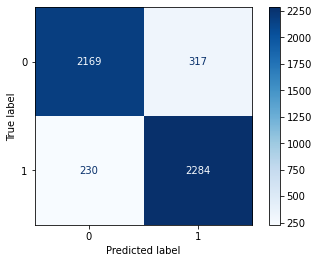

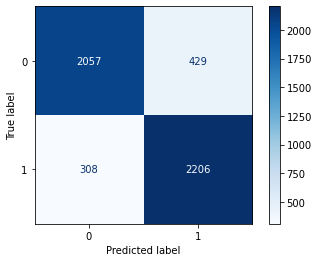

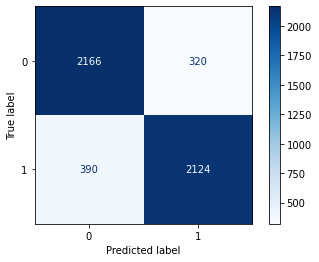

In [13]:
train_models(Xtrain_tf_idf, Xval_tf_idf, y_train, y_val)

In [14]:
# mnb = MultinomialNB()
# mnb.fit(Xtrain_tf_idf, y_train)

log = LogisticRegression()
log.fit(Xtrain_tf_idf, y_train)

LogisticRegression()

In [15]:
y_pred = log.predict(Xval_tf_idf)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
print('val accuracy %s' % accuracy_score(y_val, y_pred))

val accuracy 0.8906


In [17]:
test = pd.read_csv('../input/shai-training-2022-a-level-2/Test.csv')
test.shape

(5000, 3)

In [19]:
# submission based on ML model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub_logis.csv', index=False)

### LSTM Model

In [20]:
#set up the tokenizer
# MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(df_tr['clean_text'].values)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  117775


In [21]:
train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text'].values)
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text'].values)


In [22]:
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'br': 2,
 'movi': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'god': 7,
 'time': 8,
 'make': 9,
 'charact': 10}

In [23]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in train_sequences + val_sequences]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1440


In [24]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))
# max_seq_len = np.max(df_tr['clean_text'].apply(lambda x :len(x)))

Maximum length of the sequence when considering data only two standard deviations from average: 304


In [25]:

perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 94.48 % of data


In [97]:
#create padded sequences
pad_train=pad_sequences(train_sequences, padding = 'post',maxlen=max_seq_len, value= 0)
pad_test=pad_sequences(val_sequences, padding = 'post',maxlen=max_seq_len,value= 0)

In [98]:
Xtrain = pad_train 
ytrain = df_tr['label'].copy()

Xval = pad_test
yval = df_val['label'].copy()


In [28]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = LSTM(120)(x)
    x = Dropout(0.4)(x)
    x = Dense(64)(x)
    x = Dropout(0.4)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose ='auto',
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [29]:
D = 100 #embedding dims
epochs = 10
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_seq_len,epochs)

----Building the model----


2022-11-08 18:43:50.236573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:43:50.240180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:43:50.240909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:43:50.242052: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 304)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 304, 100)          11777600  
_________________________________________________________________
lstm (LSTM)                  (None, 120)               106080    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                7744      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65    

2022-11-08 18:43:53.412510: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-08 18:43:55.587326: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 28s 19ms/step - loss: 0.6933 - accuracy: 0.5067 - val_loss: 0.6901 - val_accuracy: 0.5054
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6786 - accuracy: 0.5386 - val_loss: 0.7057 - val_accuracy: 0.5044
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6726 - accuracy: 0.5302 - val_loss: 0.6929 - val_accuracy: 0.5070
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6759 - accuracy: 0.5220 - val_loss: 0.6990 - val_accuracy: 0.5114
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6681 - accuracy: 0.5235 - val_loss: 0.7196 - val_accuracy: 0.5082
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6568 - accuracy: 0.5367 - val_loss: 0.6971 - val_accuracy: 0.5120
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5663 - accuracy: 0.6599 - val_loss: 0.3693 - val_accura

In [33]:
# save model to single file
model.save('lstm_model.h5')


In [101]:
from keras.models import load_model

# load model from single file
model = load_model('lstm_model.h5')
# make predictions
ypred = model.predict(Xval)
print(ypred)


[[0.9341533 ]
 [0.02272326]
 [0.9446824 ]
 ...
 [0.7670406 ]
 [0.02331116]
 [0.8054335 ]]


In [102]:
ypred.shape

(5000, 1)

In [40]:
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
ypred = seq_predictions

Outputs shape
(5000, 1)
(5000,)


In [37]:
test = pd.read_csv('../input/shai-training-2022-a-level-2/Test.csv')


In [39]:
# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = ypred
submission.to_csv('sub_lstm.csv', index=False)

In [65]:
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    fig , ax = plt.subplots(1,2,figsize = (10,5))

    ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
    ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
    ax[0].set_title('Training and Validation accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
    ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
    ax[1].set_title('Training and Validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    fig.tight_layout()
    plt.show()

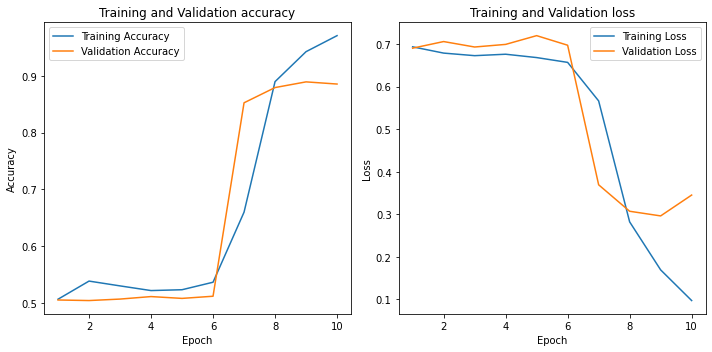

In [66]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [67]:
plt.savefig('lstm_1.png')

<Figure size 432x288 with 0 Axes>

In [32]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,yval)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
157/157 [==============================] - 1s 7ms/step - loss: 0.3452 - accuracy: 0.8854
{'loss': 0.3452295660972595, 'accuracy': 0.8853999972343445}


# Good Finish 8-Nov

# Try Glove

In [45]:

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "../input/glove6b/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [72]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df_tr['clean_text'])
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 117774


In [73]:
train_sequences = tokenizer.texts_to_sequences(df_tr['clean_text'].values)
val_sequences = tokenizer.texts_to_sequences(df_val['clean_text'].values)


In [74]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in train_sequences + val_sequences]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1440


In [75]:
# # when setting the maximum length of sequence, variability around the average is used.
# max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
# max_seq_len = int(max_seq_len)
# print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))
# # max_seq_len = np.max(df_tr['clean_text'].apply(lambda x :len(x)))

In [116]:
#create padded sequences
pad_train=pad_sequences(train_sequences, padding = 'post',maxlen=max_len)
pad_test=pad_sequences(val_sequences, padding = 'post',maxlen=max_len)

In [117]:
Xtrain = pad_train 
ytrain = df_tr['label'].copy()

Xval = pad_test
yval = df_val['label'].copy()


In [118]:
embeddings_index = {}
f = open(GLOVE_DIR)
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: ../input/glove6b/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [119]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = max_len,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(1, activation="sigmoid")(x)

In [120]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

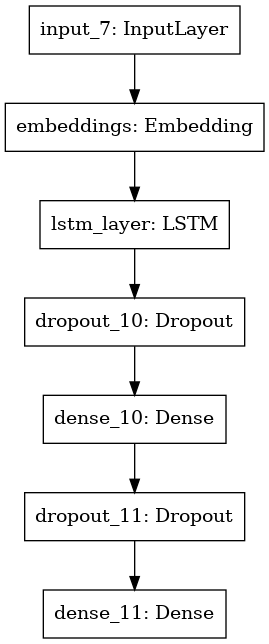

In [121]:
import tensorflow as tf
tf.keras.utils.plot_model(model)


In [122]:
print('Training progress:')
history = model.fit(Xtrain, ytrain, epochs = 10, batch_size=64, validation_data=(Xval, yval))

Training progress:
Epoch 1/10
625/625 [==============================] - 41s 64ms/step - loss: 0.6898 - accuracy: 0.5158 - val_loss: 0.7124 - val_accuracy: 0.4974
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5045
Epoch 3/10
625/625 [==============================] - 39s 63ms/step - loss: 0.6921 - accuracy: 0.5101 - val_loss: 0.6504 - val_accuracy: 0.6680
Epoch 4/10
625/625 [==============================] - 39s 63ms/step - loss: 0.5462 - accuracy: 0.7225 - val_loss: 0.4705 - val_accuracy: 0.7741
Epoch 5/10
625/625 [==============================] - 39s 62ms/step - loss: 0.4554 - accuracy: 0.7914 - val_loss: 0.4278 - val_accuracy: 0.8069
Epoch 6/10
625/625 [==============================] - 39s 62ms/step - loss: 0.4186 - accuracy: 0.8104 - val_loss: 0.4097 - val_accuracy: 0.8137
Epoch 7/10
625/625 [==============================] - 39s 62ms/step - loss: 0.3963 - accuracy: 0.8230 - val_loss: 0.3

In [123]:
# save model to single file
model.save('lstm_glove6b.h5')


In [124]:
ypred = model.predict(Xval)
print(ypred)

[[[0.59487575]
  [0.52522373]
  [0.56003225]
  ...
  [0.04438729]
  [0.04440025]
  [0.04441321]]

 [[0.48285988]
  [0.52331746]
  [0.48014864]
  ...
  [0.11459415]
  [0.11462678]
  [0.11465942]]

 [[0.44778237]
  [0.49626434]
  [0.45278087]
  ...
  [0.55789906]
  [0.5579593 ]
  [0.5580196 ]]

 ...

 [[0.55089074]
  [0.53753805]
  [0.64074385]
  ...
  [0.5491617 ]
  [0.54922736]
  [0.54929304]]

 [[0.4450682 ]
  [0.5780712 ]
  [0.5457984 ]
  ...
  [0.8918446 ]
  [0.89185023]
  [0.8918561 ]]

 [[0.566022  ]
  [0.6037786 ]
  [0.6038914 ]
  ...
  [0.9600908 ]
  [0.9600875 ]
  [0.9600842 ]]]


In [140]:
seq_predictions=model.predict(Xval)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]# transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
seq_predictions=seq_predictions[0]# transformation to get (n,)
print(seq_predictions.shape)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
ypred = seq_predictions

Outputs shape
(5000, 1440, 1)
(1440, 5000)
(5000,)


In [141]:
# submission based on LSTM model 
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = ypred
submission.to_csv('sub_glove6b.csv', index=False)

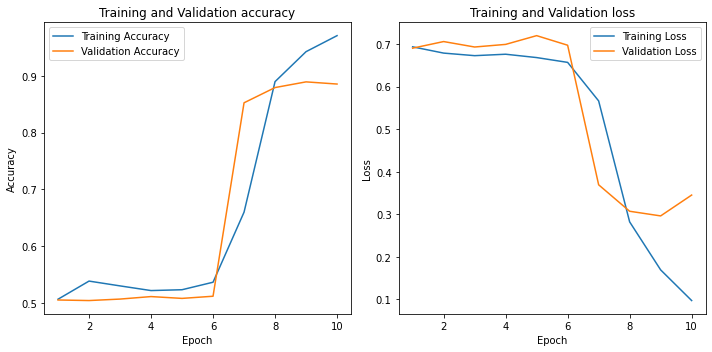

In [142]:
plotLearningCurve(r,n_epochs)

In [143]:
plt.savefig('lstm_glove6b.png')

<Figure size 432x288 with 0 Axes>